We build predictive models for bank telemarketing problem.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The dataset can also be obtained from https://archive.ics.uci.edu/ml/datasets/bank+marketing .

In [18]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate, RepeatedKFold, RepeatedStratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# Convert the target variable to binary
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data into features and target variable
X = df.drop('y', axis=1)
y = df['y']


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

Logistic regression is a statistical method used to model the probability of a binary outcome based on one or more predictor variables. 

In logistic regression, the probability of the binary outcome is modeled as a function of one or more predictor variables. The model uses a logistic function (also called the sigmoid function) to transform the linear combination of the predictor variables into a probability value between 0 and 1.

The logistic regression model estimates the coefficients of the predictor variables using maximum likelihood estimation. These coefficients indicate the direction and strength of the relationship between the predictor variables and the binary outcome.

##### Advantage
It can handle both categorical and continuous predictor variables, and it can model nonlinear relationships between the predictor variables and the outcome. 

##### Disadvantage
It assumes that the relationship between the predictor variables and the binary outcome is linear on the logit scale. It can also be sensitive to outliers and the presence of multicollinearity among the predictor variables.

Best C value: 4.281332398719396


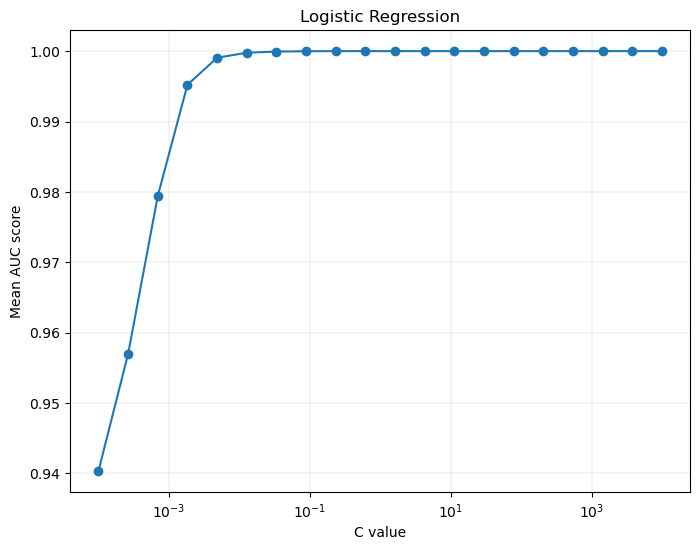

In [44]:
C_list = np.logspace(-4, 4, 20)

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

mean_auc_scores = []

for C in C_list:
    
    # Create the logistic regression model with the specified C value
    log_reg = LogisticRegression(C=C, max_iter=500, random_state=42)
    
    # Calculate the AUC score using cross-validation
    auc_scores = cross_val_score(log_reg, X, y, cv=cv, scoring='roc_auc')
    
    # Append the mean score to the list
    mean_auc_scores.append(np.mean(auc_scores))
    
# Set up the figure with a grid
fig = plt.figure(figsize=(8, 6))
main_ax = fig.add_subplot(1, 1, 1)

# Plot the mean AUC scores with points
main_ax.plot(C_list, mean_auc_scores, 'o-')
main_ax.set_xscale('log')
main_ax.set_xlabel('C value')
main_ax.set_ylabel('Mean AUC score')
main_ax.set_title('Logistic Regression')

# Add gridlines to the main plot
main_ax.grid(color='gray', linestyle='-', linewidth=0.25, alpha=0.5)

# Print the C value with the highest mean AUC score
best_C = C_list[np.argmax(mean_auc_scores)]
print(f'Best C value: {best_C}')

plt.show()


# Random Forest Model


Random forest classifier is a popular machine learning algorithm used for classification tasks. It is an ensemble learning method that combines multiple decision trees to produce a more accurate and robust model.

The random forest classifier works by building a large number of decision trees, each of which is trained on a random subset of the training data and a random subset of the predictor variables. During training, the algorithm splits the data into subsets based on the values of the predictor variables, and each tree is built using a different subset of the data and predictor variables.

##### Advantage
The final prediction of the random forest classifier is obtained by taking a majority vote of the predictions of all the individual decision trees. This approach helps to reduce overfitting of the model to the training data and increase the robustness of the model to noise in the data.

##### Disadvantage
It can be difficult to interpret the final model, since it is made up of many individual decision trees. However, various methods exist to extract feature importance rankings and to visualize the decision-making process of the individual trees.


In [19]:


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 250, 500, 1000],
    'max_depth': [50, 150, 250],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3]
}

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=cv, # 3 ?
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1
)

grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)


Fitting 9 folds for each of 108 candidates, totalling 972 fits
Best hyperparameters:  {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}
Best score:  0.944422141528528


### Neural Network


In a classification problem, a neural network takes a set of input features and produces a probability distribution over the possible classes. During training, the network adjusts its weights and biases to minimize the difference between its predicted probabilities and the true class labels in the training data.

A Multilayer Perceptron (MLP) classifier is a type of neural network used for classification tasks. It is a feedforward neural network that consists of multiple layers of interconnected nodes (neurons).

In an MLP classifier, the input layer consists of the input features, and the output layer consists of the output classes (i.e., the possible categories or labels). The hidden layers in between are composed of a number of neurons, each of which computes a weighted sum of the inputs and applies an activation function to produce an output.

During training, the MLP classifier adjusts its weights and biases to minimize the difference between its predicted output and the true class labels in the training data. This is typically done using an optimization algorithm such as stochastic gradient descent.

##### Advantages
They can learn complex nonlinear relationships between the input features and the output classes, and they can handle both continuous and categorical input features. They are also capable of automatically extracting useful features from the input data, which can reduce the need for manual feature engineering.

##### Disadvantages
MLP classifiers can be computationally intensive and require large amounts of data for training. They can also be prone to overfitting if the model is too complex relative to the amount of training data. Regularization techniques such as dropout and weight decay can help to prevent overfitting and improve the generalization performance of the model.


In [16]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10)],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
}

# Create a neural network classifier
nn = MLPClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=nn,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1
)

grid_search.fit(X_scaled, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)


Fitting 9 folds for each of 20 candidates, totalling 180 fits


/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bernayilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyperparameters:  {'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10, 10, 10)}
Best score:  0.93939195041874


### Classification Report

Here cross validation technique are not used

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np

# Define the models with optimal hyperparameters from tasks 2 and 3
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_split=2, min_samples_leaf=3, random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), alpha=0.1, random_state=42)
lr_model = LogisticRegression(C=1, max_iter=500)

# Define the KFold with 5 folds
#kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)


# Logistic Regression Classifier
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
lr_report = classification_report(y_test, lr_pred)

    
# Random Forest Model
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_pred)

    
# Neural Network Model
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)
nn_report = classification_report(y_test, nn_pred) #instead of y_test, use y


# Print the average classification report for each model
print("Logistic Regression Model - Average Classification Report:")
print(lr_report)
print("Random Forest Model - Average Classification Report:")
print(rf_report)
print("Neural Network Model - Average Classification Report:")
print(nn_report)

Logistic Regression Model - Average Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Random Forest Model - Average Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.70      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.82      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357

Neural Network Model - Average Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10968
           1       0.62      0.61      0.62      1389

    accuracy    

In [8]:

scaler = StandardScaler()
X = scaler.fit_transform(X) 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

# Logistic Regression Classifier
lr = LogisticRegression(C=1, max_iter=500)
lr_score = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')
lr.fit(X, y)
lr_pred = lr.predict(X)
print('Logistic Regression:')
print(classification_report(y, lr_pred))

# Random Forest Model
rf = RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_split=2, min_samples_leaf=3, random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
rf.fit(X, y)
rf_pred = rf.predict(X)
print('Random Forest:')
print(classification_report(y, rf_pred))

# Neural Network Model
nn = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), alpha=0.1, random_state=42)
nn_scores = cross_val_score(nn, X, y, cv=cv, scoring='roc_auc')
nn.fit(X, y)
nn_pred = nn.predict(X)
print('Neural Network:')
print(classification_report(y, nn_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36548
           1       0.67      0.42      0.52      4640

    accuracy                           0.91     41188
   macro avg       0.80      0.70      0.74     41188
weighted avg       0.90      0.91      0.90     41188

Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     36548
           1       0.93      0.70      0.80      4640

    accuracy                           0.96     41188
   macro avg       0.94      0.85      0.89     41188
weighted avg       0.96      0.96      0.96     41188

Neural Network:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     36548
           1       0.66      0.61      0.63      4640

    accuracy                           0.92     41188
   macro avg       0.81      0.78      0.80     41188
weighted avg       0.9

### COMPARISON
The results show that Random Forest has the highest accuracy and F1-score for predicting the binary classification. Its accuracy is 0.96, and the F1-score is 0.80 for class 1, which means it can predict the minority class with good precision and recall.

Logistic Regression is the second-best model, with an accuracy of 0.91 and an F1-score of 0.52 for class 1. However, it has a lower recall value for class 1, indicating that it may miss some positive cases.

The Neural Network model has an accuracy of 0.92, which is slightly lower than the other two models. Its F1-score for class 1 is 0.63, indicating that it has a decent precision but lower recall for the minority class.

Overall, the Random Forest model seems to be the best model for this binary classification task, followed by Logistic Regression, while Neural Network comes in third.